In [34]:
import numpy as np
import sys
import matplotlib.pyplot as plt
from pylab import setp
from matplotlib.pyplot import rcParams
rcParams['mathtext.default'] = 'regular'
from scipy.interpolate import splrep, splev
import pandas as pd
from limits import LimitFigure, ara_energies, ara_available, ara_projected, efficiencies

import constants as const
#import tools as tool
sys.path.insert(0, '/Users/neutrino/Desktop/Research/PlottingScripts/tools.py')
import tools as tool
import plots as plotter

def plot_final_limit(make_counts_plot=False): #if true, then make counts plot
    livetime = np.array([15518810,12404200,8160666,35390429,22788969])

    # energy bins we have in units of log10(energy)
    energy_bins = np.array([3.16E17,3.16E18,3.16E19,3.16E20])
    
    
    # the effective volume (in cubic kilometers * steradians), which we know from Jorge calculating them for us
    config={}
    config["veff_steradian_config1"] = np.array([1.21, 9.15, 30.20, 61.15])
    config["veff_steradian_config2"] = np.array([1.21, 9.15, 30.20, 61.15])
    config["veff_steradian_config3"] = np.array([1.21, 9.15, 30.20, 61.15])
    config["veff_steradian_config4"] = np.array([1.21, 9.15, 30.20, 61.15])
    config["veff_steradian_config5"] = np.array([1.21, 9.15, 30.20, 61.15])

    # convert to km^3 to cm^3
    # veff_steradian_config1*=1e15

    #The eficiencies for each config
    # config["eff_config1"] = np.array([0.34, 0.42, 0.47, 0.56, 0.58, 0.65, 0.69])
    #config["eff_config2"] = np.array([0.25,0.34,0.40,0.44,0.48,0.60,0.64])
    #config["eff_config3"] = np.array([0.33,0.43,0.49,0.58,0.63,0.67,0.87])
    #config["eff_config4"] = np.array([0.29,0.38,0.46,0.55,0.58,0.65,0.69])
    #config["eff_config5"] = np.array([0.31,0.40,0.46,0.54,0.60,0.67,0.80])


    #Efficiencies if only integer log10(energy) 
    config["eff_config1"] = np.array([0.40, 0.51, 0.60, 0.71])
    config["eff_config2"] = np.array([0.32, 0.42, 0.51, 0.64])
    config["eff_config3"] = np.array([0.41, 0.53, 0.64, 0.87])
    config["eff_config4"] = np.array([0.36, 0.50, 0.60, 0.69])
    config["eff_config5"] = np.array([0.38, 0.49, 0.62, 0.80])

    combined_aeff=0
    combined_limit=0
    for x in range(1,6):
        config["veff_steradian_config{0}".format(x)]*=1e15
        #config["veff_steradian_config{0}".format(x)]*=config["eff_config{0}".format(x)]#change to config["eff_config{0}".format(x)] whenever you add the rest of the efficiencies
        config["aeff_steradian_config{0}".format(x)]=config["veff_steradian_config{0}".format(x)]/tool.get_Lint(energy_bins,1)
       # print(tool.get_Lint(energy_bins))
        config["EFE_config{0}".format(x)]=1/(np.log(10)*livetime[x-1]*config["aeff_steradian_config{0}".format(x)]*config["eff_config{0}".format(x)])
        combined_aeff+=config["aeff_steradian_config{0}".format(x)]*livetime[x-1]*config["eff_config{0}".format(x)]
        
        
    combined_limit=2.44/(np.log(10)*combined_aeff)
    #aeff_interpolator = splrep(energy_bins, np.log10(aeff_steradian_config1))

    #plot shit

    if __name__=="__main__":
        figure = LimitFigure(e_power=1, xlims=(1e6, 1e11), ylims=(1e-19, 2e-13), font_size=16, tick_size=14)
        figure.build_base_plot('ara')
        ara_analysis_level = pd.read_csv("ara_analysis_level.csv")
        plt.plot(ara_analysis_level["energy"][-8:]/1e9,ara_analysis_level["limit"][-8:], color= "black")
        plt.annotate('ARA (2x10mo)',xy=(1.9e8, 1.6e-14), xycoords='data',horizontalalignment='left', color='black', rotation=-40, fontsize=12)
        projected=pd.read_csv("ARA5_projected_data_AraSim.csv")
        A1,=plt.plot(energy_bins/1e9, combined_limit/2, label="ARA (analysis level, this work)", color='#2288AA', linewidth=3)
        ARA_UL,=plt.plot(projected["energy"], projected["limit"]*2.44, ":", linewidth='1.5', c="darkmagenta", label = 'ARA5 Projected (2012-2022), 90% UL, trigger level')
        ARA_SES,=plt.plot(projected["energy"], projected["limit"], "--", linewidth='1.5', c="darkmagenta", label = 'ARA5 Projected (2012-2022), SES, trigger level')
        plt.annotate('ARA (2x4yr)',xy=(2.6e8, 1e-15), xycoords='data',horizontalalignment='left', color='#2288AA', rotation=-45, fontsize=12)
        
    plt.tight_layout()
    #plt.show()
    #fig.savefig("final_limits.png",edgecolor='none',bbox_inches="tight") #save the figure
    figure.show(legend_size=10)
    plt.fill_between(projected["energy"], projected["limit"]*2.44, projected["limit"], alpha=0.2, color="darkmagenta")
    plt.legend(handles=[A1, ARA_UL, ARA_SES], loc='best', prop={'size': 7.5})
    plt.savefig('current_limits_half_proceedings.png',dpi=300)
    plt.show()
    return figure

"""
Uncomment the fuction, depending of what you want to get.
"""
#get_veff_plot()

'\nUncomment the fuction, depending of what you want to get.\n'

Using Connolly et al. Xsec
Using Connolly et al. Xsec
Using Connolly et al. Xsec
Using Connolly et al. Xsec
Using Connolly et al. Xsec


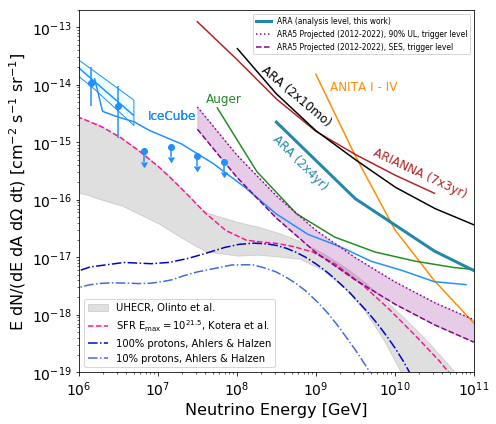

In [35]:
plot_final_limit()